# Extensions to Linear Models - Lab

## Introduction

In this lab, you'll practice many concepts learned in this section, from adding interactions and polynomials to your model to AIC and BIC!

## Summary

You will be able to:
- Build a linear regression model with polynomial features/interactions
- Perform regularization
- Use AIC and BIC to select the best value for the regularization parameter


## Let's get started!

Import all the necessary packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import warnings
#warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing

from sklearn.datasets import load_boston

## Look at a Baseline Boston Housing Data Model

Import the Boston housing data set, use all the predictors in their scaled version (using `preprocessing.scale`. Look at a baseline model using *scaled variables* as predictors. Use 5-fold cross-validation this time and use the $R^2$ score to evaluate the model.

In [2]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


All floats, so don't have to worry about dealing with binarizing variables.
Let's scale the variables.  

But first let's get the target variable, and then train|test split.

In [4]:
y = pd.DataFrame(boston.target, columns=['PRICE'])

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
np.random.seed(8675309)
X_tr, X_te, y_tr, y_te, idx_tr, idx_te = train_test_split( X, y, range(len(y)))

In [7]:
ss = preprocessing.StandardScaler()

sfit = ss.fit(X_tr)

In [8]:
X_sc_tr = pd.DataFrame(sfit.transform(X_tr), columns=X_tr.columns)
X_sc_te = pd.DataFrame(sfit.transform(X_te), columns=X_te.columns)

In [9]:
lr = LinearRegression()

In [10]:
cv = KFold(n_splits=5, shuffle=True, random_state=1)

baseline = np.mean(cross_val_score(lr, X_tr, y_tr, scoring="r2", cv=cv))
baseline

0.6806568932790938

## Include interactions

Look at all the possible combinations of variables for interactions by adding interactions one by one to the baseline model. Next, evaluate that model using 5-fold cross validation and store the $R^2$ to compare it with the baseline model.

You've created code for this before in the interactions lab, yet this time, you have scaled the variables so the outcomes may look different. 

Print the 7 most important interactions.

Write code to include the 7 most important interactions in your data set by adding 7 columns. Name the columns "var1_var2" with var1 and var2 the two variables in the interaction.

In [11]:
# Your code here

In [12]:
from itertools import combinations

In [13]:
combos = list(combinations(X_sc_tr, 2))

In [14]:
combos

[('CRIM', 'ZN'),
 ('CRIM', 'INDUS'),
 ('CRIM', 'CHAS'),
 ('CRIM', 'NOX'),
 ('CRIM', 'RM'),
 ('CRIM', 'AGE'),
 ('CRIM', 'DIS'),
 ('CRIM', 'RAD'),
 ('CRIM', 'TAX'),
 ('CRIM', 'PTRATIO'),
 ('CRIM', 'B'),
 ('CRIM', 'LSTAT'),
 ('ZN', 'INDUS'),
 ('ZN', 'CHAS'),
 ('ZN', 'NOX'),
 ('ZN', 'RM'),
 ('ZN', 'AGE'),
 ('ZN', 'DIS'),
 ('ZN', 'RAD'),
 ('ZN', 'TAX'),
 ('ZN', 'PTRATIO'),
 ('ZN', 'B'),
 ('ZN', 'LSTAT'),
 ('INDUS', 'CHAS'),
 ('INDUS', 'NOX'),
 ('INDUS', 'RM'),
 ('INDUS', 'AGE'),
 ('INDUS', 'DIS'),
 ('INDUS', 'RAD'),
 ('INDUS', 'TAX'),
 ('INDUS', 'PTRATIO'),
 ('INDUS', 'B'),
 ('INDUS', 'LSTAT'),
 ('CHAS', 'NOX'),
 ('CHAS', 'RM'),
 ('CHAS', 'AGE'),
 ('CHAS', 'DIS'),
 ('CHAS', 'RAD'),
 ('CHAS', 'TAX'),
 ('CHAS', 'PTRATIO'),
 ('CHAS', 'B'),
 ('CHAS', 'LSTAT'),
 ('NOX', 'RM'),
 ('NOX', 'AGE'),
 ('NOX', 'DIS'),
 ('NOX', 'RAD'),
 ('NOX', 'TAX'),
 ('NOX', 'PTRATIO'),
 ('NOX', 'B'),
 ('NOX', 'LSTAT'),
 ('RM', 'AGE'),
 ('RM', 'DIS'),
 ('RM', 'RAD'),
 ('RM', 'TAX'),
 ('RM', 'PTRATIO'),
 ('RM', 'B'),
 

In [15]:
combo_test = combos[0]
combo_test

('CRIM', 'ZN')

In [16]:
baseline

0.6806568932790938

In [17]:
#Initialize list to store good scores
interacts = []

#For each combo, subset on that interaction only and create and score an LR
for combo in combos:
    
    #subset
    X_sc_tr["curr_iteract"] = X_sc_tr[combo[0]] * X_sc_tr[combo[1]]
    
    #model
    this_lr = LinearRegression()
    k10 = KFold(n_splits=10, shuffle=True)
    
    #score
    this_score = np.mean(cross_val_score(estimator=this_lr
                   ,X=X_sc_tr
                   ,y=y_tr
                   ,scoring='r2'
                   ,cv=k10))
    
    #Add if 'better' (>) than baseline
    if this_score > baseline:
        interacts.append((combo[0], combo[1], this_score))



In [18]:
#Sort the list, show top 7
interacts = sorted(interacts, key = lambda this_inter : this_inter[2], reverse=True)
interacts[:7]

[('INDUS', 'RM', 0.7653859458015946),
 ('RM', 'TAX', 0.7625969790793649),
 ('RM', 'RAD', 0.7505890468962788),
 ('RM', 'LSTAT', 0.7358920095972259),
 ('RM', 'DIS', 0.7265713397178384),
 ('RM', 'AGE', 0.7238678290484863),
 ('NOX', 'RM', 0.7235996432121552)]

In [30]:
# Make a copy of orig df
X_inter_tr = X_tr.copy()
X_inter_te = X_te.copy()

# Add the 7 columns
for inter in interacts[:7]:
    X_inter_tr[inter[0]+"_"+inter[1]] = X_inter_tr[inter[0]]*X_inter_tr[inter[1]]
    X_inter_te[inter[0]+"_"+inter[1]] = X_inter_te[inter[0]]*X_inter_te[inter[1]]


In [31]:
X_inter_tr.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,INDUS_RM,RM_TAX,RM_RAD,RM_LSTAT,RM_DIS,RM_AGE,NOX_RM
150,1.65660,0.0,19.58,0.0,0.871,6.122,97.3,1.6180,5.0,403.0,14.7,372.80,14.10,119.86876,2467.166,30.610,86.32020,9.905396,595.6706,5.332262
73,0.19539,0.0,10.81,0.0,0.413,6.245,6.2,5.2873,4.0,305.0,19.2,377.17,7.54,67.50845,1904.725,24.980,47.08730,33.019188,38.7190,2.579185
207,0.25199,0.0,10.59,0.0,0.489,5.783,72.7,4.3549,4.0,277.0,18.6,389.43,18.06,61.24197,1601.891,23.132,104.44098,25.184387,420.4241,2.827887
291,0.07886,80.0,4.95,0.0,0.411,7.148,27.7,5.1167,4.0,245.0,19.2,396.90,3.56,35.38260,1751.260,28.592,25.44688,36.574172,197.9996,2.937828
307,0.04932,33.0,2.18,0.0,0.472,6.849,70.3,3.1827,7.0,222.0,18.4,396.90,7.53,14.93082,1520.478,47.943,51.57297,21.798312,481.4847,3.232728


## Include Polynomials

Try polynomials of 2, 3 and 4 for each variable, in a similar way you did for interactions (by looking at your baseline model and seeing how $R^2$ increases). Do understand that when going for a polynomial of 4, the particular column is raised to the power of 2 and 3 as well in other terms. We only want to include "pure" polynomials, so make sure no interactions are included. We want the result to return a list that contain tuples of the form:

`(var_name, degree, R2)`, so eg. `('DIS', 3, 0.732)`

In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [22]:
polys = []

for col in X_tr.columns:
    for degree in [2,3,4]:
        # Create poly object
        pf = PolynomialFeatures(degree=degree, include_bias=False)
        
        # Generate polynomial for column and transform
        X_col_pf= pf.fit_transform(X_tr[[col]])
#         print(X_col_pf.shape)
        # Combine with orig training set
        this_tr = X_tr.copy()
#         print(this_tr.shape)
        this_tr = pd.concat([this_tr.drop(col, axis=1), pd.DataFrame(X_col_pf, index=idx_tr)], axis=1)
        
#       print(this_tr.shape)
        #Score and store
        this_score = np.mean(cross_val_score(estimator=this_lr
                       ,X=this_tr
                       ,y=y_tr
                       ,scoring='r2'
                       ,cv=k10))
        
        polys.append((col, degree, round(this_score,3)))
        

In [23]:
# Your code here
polys_sorted = sorted(polys, key = lambda poly : poly[2], reverse=True)
polys_sorted[:7]

[('RM', 4, 0.778),
 ('LSTAT', 2, 0.756),
 ('LSTAT', 4, 0.743),
 ('RM', 3, 0.742),
 ('DIS', 3, 0.732),
 ('RM', 2, 0.73),
 ('INDUS', 4, 0.71)]

For each variable, print out the maximum R2 possible when including Polynomials.

In [24]:
polys_df = pd.DataFrame(polys_sorted)
polys_df.groupby(by=[0])[2].max()

0
AGE        0.699
B          0.707
CHAS       0.702
CRIM       0.701
DIS        0.732
INDUS      0.710
LSTAT      0.756
NOX        0.693
PTRATIO    0.695
RAD        0.707
RM         0.778
TAX        0.709
ZN         0.701
Name: 2, dtype: float64

Which two variables seem to benefit most from adding Polynomial terms?

> `LSTAT` and `RM`

Add Polynomials for the two features that seem to benefit the most, as in have the best R squared compared to the baseline model. For each of the two feature, raise to the Polynomial that generates the best result. Make sure to start from the data set `df_inter` so the final data set has both interactions and polynomials in the model.

In [32]:
# Your code here

# 'RM', 4, 0.778
X_inter_tr['RM_4'] = X_inter_tr['RM']**4
X_inter_te['RM_4'] = X_inter_te['RM']**4
    
# 'LSTAT', 2, 0.756
X_inter_tr['LSTAT_2'] = X_inter_tr['LSTAT']**2
X_inter_te['LSTAT_2'] = X_inter_te['LSTAT']**2


check out your final data set and make sure that your interaction terms as well as your polynomial terms are included.

In [35]:
# Your code here
X_inter_te.head().T
X_inter_tr.shape

(379, 22)

In [36]:
X_inter_te.shape

(127, 22)

## Full model R-squared

Check out the R-squared of the full model.

In [39]:
# Your code here

# Declare model object
lr_full = LinearRegression()

# Set up kfold
k10_full = KFold(n_splits=10, shuffle=True)

r2_full = np.mean(cross_val_score(estimator=lr_full, X=X_inter_tr, y=y_tr
                                 ,scoring='r2'
                                 ,cv=k10_full))


In [40]:
print(r2_full)

0.7363876020789252


In [41]:
baseline

0.6806568932790938

Better!

## Finding the best Lasso regularization parameter

You've learned that, when using Lasso regularization, your coefficients shrink to 0 when using a higher regularization parameter. Now the question is which value we should choose for the regularization parameter. 

This is where the AIC and BIC come in handy! We'll use both criteria in what follows and perform cross-validation to select an optimal value of the regularization parameter alpha of the Lasso estimator.

Read the page here: https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html and create a similar plot as the first one listed on the page. 

In [42]:
# Your code here
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC

In [44]:
y_tr.head()

,PRICE
150,21.5
73,23.4
207,22.5
291,37.3
307,28.2


Model Lasso's using with AIC and BIC tgt metrics

In [47]:
model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X_inter_tr, y_tr['PRICE'])
alpha_aic_ = model_aic.alpha_

model_bic = LassoLarsIC(criterion='bic')
model_bic.fit(X_inter_tr, y_tr['PRICE'])
alpha_bic_ = model_bic.alpha_

In [51]:
def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_
    alphas_ = model.alphas_
    criterion_ = model.criterion_
    plt.plot(-np.log(alphas_), criterion_, '--', color=color, linewidth=2, label= name)
    plt.axvline(-np.log(alpha_), color=color, linewidth=2,
                label='alpha for %s ' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

/opt/conda/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


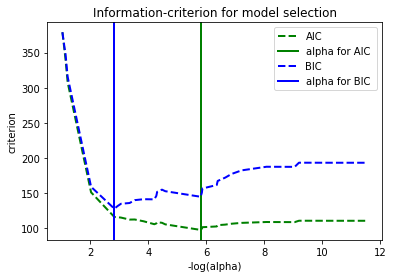

In [52]:
plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'green')
plot_ic_criterion(model_bic, 'BIC', 'blue')
plt.legend()
plt.title('Information-criterion for model selection');

## Analyze the final result

Finally, use the best value for regularization parameter according to AIC and BIC and compare the R squared parameters and MSE using train-test-split. Compare with the baseline model.

In [11]:
# Code for baseline model


In [60]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error 

In [61]:
# code for lasso with alpha from AIC
lasso = Lasso(alpha= model_aic.alpha_) 
lasso.fit(X_inter_tr, y_tr)

/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.003020702946989505, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [62]:
print('Training r^2:', lasso.score(X_inter_tr, y_tr))
print('Testing r^2:', lasso.score(X_inter_te, y_te))

print('Training MSE:', mean_squared_error(y_tr, lasso.predict(X_inter_tr)))
print('Testing MSE:', mean_squared_error(y_te, lasso.predict(X_inter_te)))

Training r^2: 0.8192205967383073
Testing r^2: 0.8393055781849577
Training MSE: 15.96143964647289
Testing MSE: 11.68080030791132


In [63]:
# code for lasso with alpha from BIC

## Level Up - Optional

### Create a Lasso Path

From this section, you know that when using lasso, more parameters shrink to zero as your regularization parameter goes up. In Scikit-Learn there is a function lasso_path which visualizes the shrinkage of the coefficients while alpha changes. Try this out yourself!

https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_coordinate_descent_path.html#sphx-glr-auto-examples-linear-model-plot-lasso-coordinate-descent-path-py

### AIC and BIC for subset selection
This notebook shows how you can use AIC and BIC purely for feature selection. Try this code out on our Boston Housing data!

https://xavierbourretsicotte.github.io/subset_selection.html

## Summary

Congratulations! You now know how to create better linear models and how to use AIC and BIC for both feature selection and to optimize your regularization parameter when performing Ridge and Lasso. 